In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
# Load dataset
df = pd.read_csv('USA_Housing.csv')
# Display first few rows
pd.set_option('display.expand_frame_repr', False)
print(df.head())


   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  Avg. Area Number of Bedrooms  Area Population         Price                                            Address
0      79545.458574             5.682861                   7.009188                          4.09     23086.800503  1.059034e+06  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1      79248.642455             6.002900                   6.730821                          3.09     40173.072174  1.505891e+06  188 Johnson Views Suite 079\nLake Kathleen, CA...
2      61287.067179             5.865890                   8.512727                          5.13     36882.159400  1.058988e+06  9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3      63345.240046             7.188236                   5.586729                          3.26     34310.242831  1.260617e+06                          USS Barnett\nFPO AP 44820
4      59982.197226             5.040555                   7.839388                          4.23   

In [12]:
lst = df.columns.to_list()
lst.remove('Price')
lst.remove('Address')
X = df[lst]
y = df['Price']



In [13]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluamos el modelo

In [19]:
predicciones = model.predict(X_test)
predicciones


array([1308536.13592596, 1237122.72746454, 1243835.62817087, ...,
       1457119.79297217, 1483428.95309281, 1047510.59737215],
      shape=(1500,))

In [20]:
y_test

1501    1.339096e+06
2586    1.251794e+06
2653    1.340095e+06
1055    1.431508e+06
705     1.042374e+06
            ...     
3563    1.348222e+06
1538    1.309937e+06
1837    1.472887e+06
2380    1.409762e+06
1912    1.009606e+06
Name: Price, Length: 1500, dtype: float64

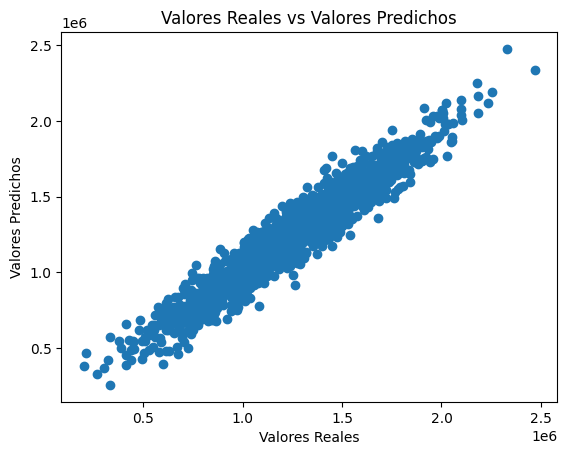

In [21]:
plt.scatter(y_test, predicciones)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs Valores Predichos')
plt.show()

/var/folders/x5/gbyfr4dd4lj_zxznt5y8s9rh0000gn/T/ipykernel_24917/4188688844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predicciones), bins=50);


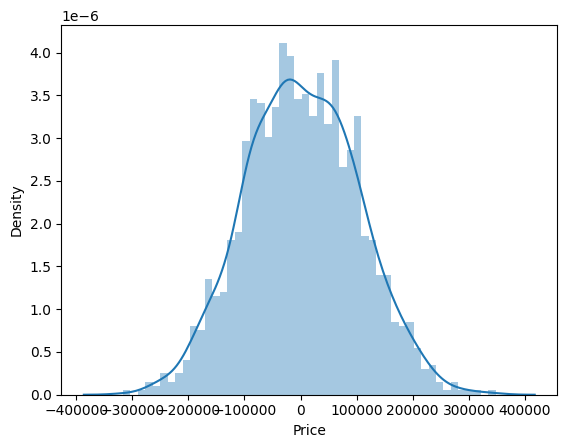

In [24]:
sns.distplot((y_test - predicciones), bins=50);

MAE(Mean Absolute Error) = media del valor absoluto de los errores

In [30]:
MAE = metrics.mean_absolute_error(y_test, predicciones)
MAE

81135.56609336875

MSE (Mean Squares Error) = media de los errores al cuadrado

In [32]:
MSE = metrics.mean_squared_error(y_test, predicciones)
MSE

10068422551.40082

RMSE(Root Mean Squared Error) = raiz cuadrada de la media de los errores al cuadrado

In [35]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test, predicciones))
RMSE

np.float64(100341.52954485406)

In [36]:
def regression_ventas(datos):
    X = datos[['tv', 'radio', 'newspaper']]
    y = datos['sales']
    return LinearRegression().fit(X, y)

In [37]:
data = {
    'tv': [230.1, 44.5, 17.2, 151.5, 180.8],
    'radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'sales': [22.1, 10.4, 9.3, 18.5, 12.9]
}
df = pd.DataFrame(data)
model_ventas = regression_ventas(df)

nuevos_datos = pd.DataFrame({
    'tv': [200.0, 50.0],
    'radio': [30.0, 20.0],
    'newspaper': [50.0, 40.0]
})
predicciones_ventas = model_ventas.predict(nuevos_datos)

print(f"estimated sales: {predicciones_ventas}")

estimated sales: [19.14644819  6.57041976]
